# **Imports**

In [0]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


# **Load Files**

## Will have to git clone everytime the VM starts

In [0]:
!git clone https://github.com/abijbart/DS4H_covid19.git
dataset_dir = 'DS4H_covid19/dataset/'

Cloning into 'DS4H_covid19'...
remote: Enumerating objects: 121, done.
remote: Counting objects: 100% (121/121), done.
remote: Compressing objects: 100% (104/104), done.
remote: Total 121 (delta 23), reused 103 (delta 14), pack-reused 0
Receiving objects: 100% (121/121), 7.89 MiB | 19.62 MiB/s, done.
Resolving deltas: 100% (23/23), done.


# **Hospital Beds**
We have hospital bed data for:
*   Italy
*   Korea
*   Switzerland
*   USA
*   India
*   Indonesia


We will need to remove Brazil from our list of countries to model 

ALSO: let's work with 2016 hospital bed data since that is most recent for USA and the other countries have 2016 data

In [0]:
hospital_beds = pd.read_csv(dataset_dir + 'OECD_hospitalbeds.csv')
hospital_beds = hospital_beds[hospital_beds['TIME'] == 2016] 
hospital_beds = hospital_beds[['LOCATION', 'Value']] # Value is number of hospital beds PER 1000 HABITANTS
hospital_beds = hospital_beds.set_index('LOCATION')
hospital_beds = hospital_beds.drop(['India', 'Indonesia'])
hospital_beds

,Value
LOCATION,
Italy,3.17
Korea,11.98
Switzerland,4.55
USA,2.77


Text(0.5, 0, 'Country')

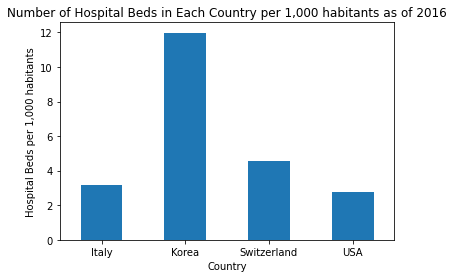

In [0]:
ax = hospital_beds.plot.bar(rot = 0, legend = False)
ax.set_title('Number of Hospital Beds in Each Country per 1,000 habitants as of 2016')
ax.set_ylabel('Hospital Beds per 1,000 habitants')
ax.set_xlabel('Country')

# **Novel Coronavirus Dataset Exploration**

In [0]:
main_df = pd.read_csv(dataset_dir + 'novel-corona-virus-2019-dataset/covid_19_data.csv')
main_df = main_df[
    (main_df['Country/Region'] == 'India') 
    | (main_df['Country/Region'] == 'South Korea') 
    | (main_df['Country/Region'] == 'Italy')
    | (main_df['Country/Region'] == 'US')
    | (main_df['Country/Region'] == 'Switzerland')
    | (main_df['Country/Region'] == 'Indonesia') ]

main_df['ObservationDate'] = pd.to_datetime(main_df['ObservationDate'])
main_df['Last Update'] = pd.to_datetime(main_df['Last Update'])

main_india = main_df[(main_df['Country/Region'] == 'India')] # 69 observation days
main_korea = main_df[(main_df['Country/Region'] == 'South Korea')] # 77 observation days
main_italy = main_df[(main_df['Country/Region'] == 'Italy')] # 68 observation days
main_switzerland = main_df[(main_df['Country/Region'] == 'Switzerland')] # 43 observation days
main_indonesia = main_df[(main_df['Country/Region'] == 'Indonesia')] # 37 observation days

## US SHOULD BE HANDLED DIFFERENTLY BECAUSE OF STATES
## WILL LIKELY COMBINE AT STATE LEVEL
## TODO
main_usa = main_df[(main_df['Country/Region'] == 'US')] # 

In [0]:
main_usa_sum = pd.DataFrame(columns=['SNo', 'ObservationDate', 'Province/State', 'Country/Region',
       'Last Update', 'Confirmed', 'Deaths', 'Recovered'])
dates = []
for date in main_usa['ObservationDate'].unique():
  dates.append(date)
  temp_usa = main_usa[main_usa['ObservationDate'] == date].copy()
  main_usa_sum = main_usa_sum.append(pd.DataFrame(temp_usa.sum(axis=0, numeric_only = True)).T)
main_usa_sum['ObservationDate'] = dates

In [0]:
main_usa_sum = main_usa_sum.reset_index()
for i in range(len(main_usa_sum)):
  main_usa_sum.at[i, 'Province/State'] = 'All'
  main_usa_sum.at[i, 'Country/Region'] = 'USA'

In [0]:
main_usa_sum

,index,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
0,0,32.0,2020-01-22,All,USA,NaN,1.0,0.0,0.0
1,0,70.0,2020-01-23,All,USA,NaN,1.0,0.0,0.0
2,0,237.0,2020-01-24,All,USA,NaN,2.0,0.0,0.0
3,0,319.0,2020-01-25,All,USA,NaN,2.0,0.0,0.0
4,0,818.0,2020-01-26,All,USA,NaN,5.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
72,0,669814.0,2020-04-03,All,USA,NaN,275586.0,7087.0,9707.0
73,0,688132.0,2020-04-04,All,USA,NaN,308850.0,8407.0,14652.0
74,0,706588.0,2020-04-05,All,USA,NaN,337072.0,9619.0,17448.0
75,0,725148.0,2020-04-06,All,USA,NaN,366667.0,10783.0,19581.0


ObservationDate is equal to number of rows


In [0]:
print(len(main_india) if len(main_india) == len(main_india['ObservationDate'].unique()) else "UNEQUAL")
print(len(main_korea) if (len(main_korea) == len(main_korea['ObservationDate'].unique())) else "UNEQUAL")
print(len(main_italy) if (len(main_italy) == len(main_italy['ObservationDate'].unique())) else "UNEQUAL")
print(len(main_switzerland) if (len(main_switzerland) == len(main_switzerland['ObservationDate'].unique())) else "UNEQUAL")
print(len(main_indonesia) if (len(main_indonesia) == len(main_indonesia['ObservationDate'].unique())) else "UNEQUAL")
print(len(main_usa_sum) if (len(main_usa_sum) == len(main_usa_sum['ObservationDate'].unique())) else "UNEQUAL")

69
77
68
43
37
77


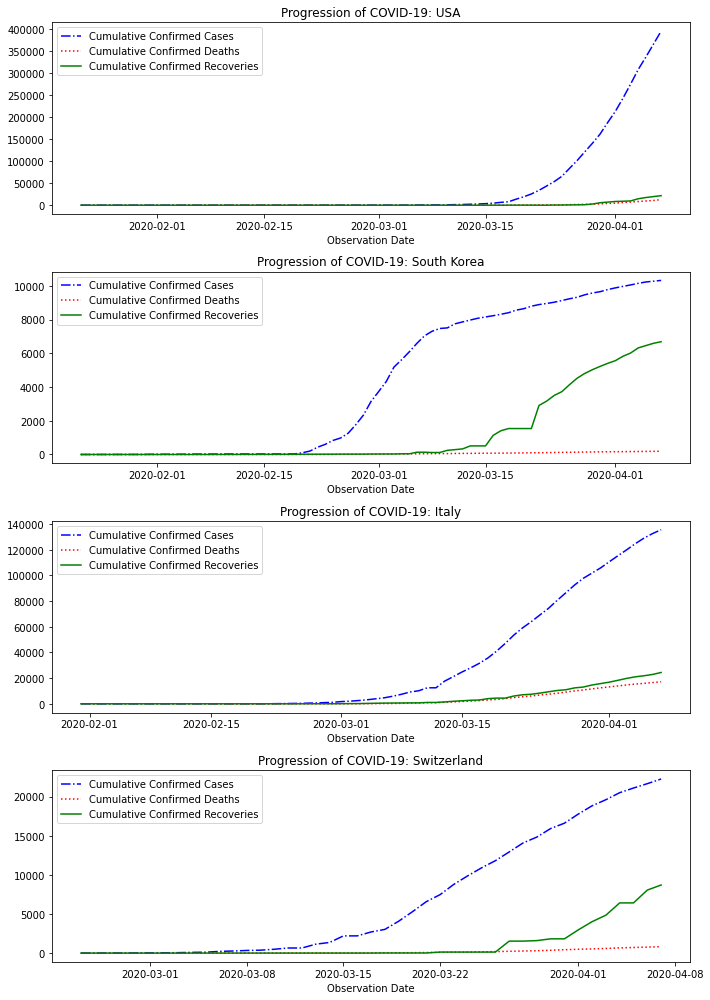

In [0]:
# main_countries = [main_usa_sum, main_india, main_korea, main_italy, main_switzerland, main_indonesia]
main_countries = [main_usa_sum, main_korea, main_italy, main_switzerland]
ROWS = len(main_countries)
COLS = 1
fig, axes = plt.subplots(nrows=ROWS, ncols=COLS, figsize=(10, 14))

r = 0
c = 0
count = 0

for country in main_countries:
  x = country['ObservationDate']
  y_confirmed = country['Confirmed']
  y_deaths = country['Deaths']
  y_recovered = country['Recovered']

  axes[r,].set_title('Progression of COVID-19: ' + country.iloc[0]['Country/Region'])
  axes[r,].set_xlabel('Observation Date')
  axes[r,].plot(x, y_confirmed, c= 'b', ls = '-.', label = 'Cumulative Confirmed Cases')
  axes[r,].plot(x, y_deaths, c= 'r', ls = ':', label = 'Cumulative Confirmed Deaths')
  axes[r,].plot(x, y_recovered, c= 'g', ls = '-', label = 'Cumulative Confirmed Recoveries')
  axes[r,].legend()

  count += 1
  r = count
  

fig.tight_layout()
plt.show()

In [0]:
# last day of collection was 4/7/20
deaths_vs_recovered = []
deaths_vs_confirmed = []
recovered_vs_confirmed = []
total_deaths = []
total_confirmed = []
total_recovered = []
countries = []
for country in main_countries:
  country = country.sort_values(by='ObservationDate')
  print(country.iloc[-1]['Country/Region'] + "\t" 
        + str(country.iloc[-1]['ObservationDate']))
  countries.append(country.iloc[-1]['Country/Region'])

  deaths_vs_recovered.append(country.iloc[-1]['Deaths'] 
                             / country.iloc[-1]['Recovered'])
  deaths_vs_confirmed.append(country.iloc[-1]['Deaths'] 
                             / country.iloc[-1]['Confirmed'])
  recovered_vs_confirmed.append(country.iloc[-1]['Recovered'] 
                                / country.iloc[-1]['Confirmed'])
  total_deaths.append(country.iloc[-1]['Deaths'])
  total_confirmed.append(country.iloc[-1]['Confirmed'])
  total_recovered.append(country.iloc[-1]['Recovered'])

ratios = pd.DataFrame()
ratios['Country'] = countries
ratios['Deaths to Recoverd Ratio'] = deaths_vs_recovered
ratios['Deaths to Confrimed Ratio'] = deaths_vs_confirmed
ratios['Recovered to Confirmed Ratio'] = recovered_vs_confirmed
ratios['Total Deaths'] = total_deaths

USA	2020-04-07 00:00:00
South Korea	2020-04-07 00:00:00
Italy	2020-04-07 00:00:00
Switzerland	2020-04-07 00:00:00


In [0]:
ratios

,Country,Deaths to Recoverd Ratio,Deaths to Confrimed Ratio,Recovered to Confirmed Ratio,Total Deaths
0,USA,0.584570,0.032108,0.054926,12722.0
1,India,0.356295,0.028243,0.079269,150.0
2,South Korea,0.028682,0.018585,0.647953,192.0
3,Italy,0.702156,0.126318,0.179901,17127.0
4,Switzerland,0.094324,0.036894,0.391138,821.0
5,Indonesia,1.083333,0.080716,0.074507,221.0


In [0]:
# newIndex = ['USA', 'India', 'Korea', 'Italy', 'Switzerland', 'Indonesia']
newIndex = ['USA', 'Korea', 'Italy', 'Switzerland']
hospital_beds = hospital_beds.reindex(newIndex)
hospital_beds['Total'] = hospital_beds['Value'] * 1000
totalbeds =  hospital_beds['Total'].tolist()

totals = pd.DataFrame()
totals['Country'] = countries
totals['Confirmed'] = total_confirmed
totals['Recovered'] = total_recovered
totals['Deaths'] = total_deaths
totals['Beds'] = totalbeds

In [0]:
totals

,Country,Confirmed,Recovered,Deaths,Beds
0,USA,396223.0,21763.0,12722.0,2770.0
1,South Korea,10331.0,6694.0,192.0,11980.0
2,Italy,135586.0,24392.0,17127.0,3170.0
3,Switzerland,22253.0,8704.0,821.0,4550.0


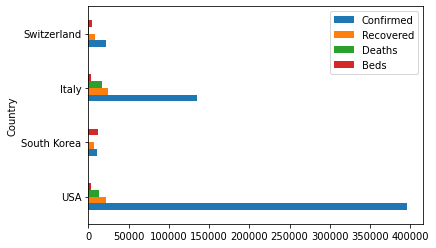

In [0]:
totals.plot.barh(x = 'Country')

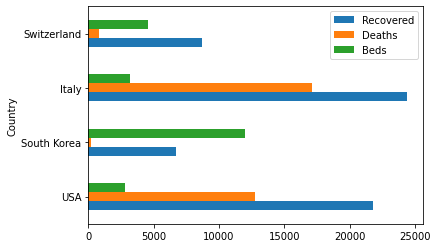

In [0]:
totals.drop(columns='Confirmed').plot.barh(x = 'Country')

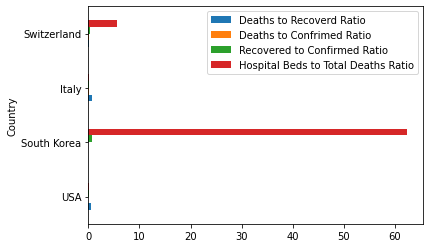

In [0]:
ratios['Total Hospital Beds'] = totalbeds
ratios['Hospital Beds to Total Deaths Ratio'] = ratios['Total Hospital Beds'] / ratios['Total Deaths']
ratios = ratios.drop(columns=['Total Deaths', 'Total Hospital Beds'])
ratios.plot.barh(x = 'Country')


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to c

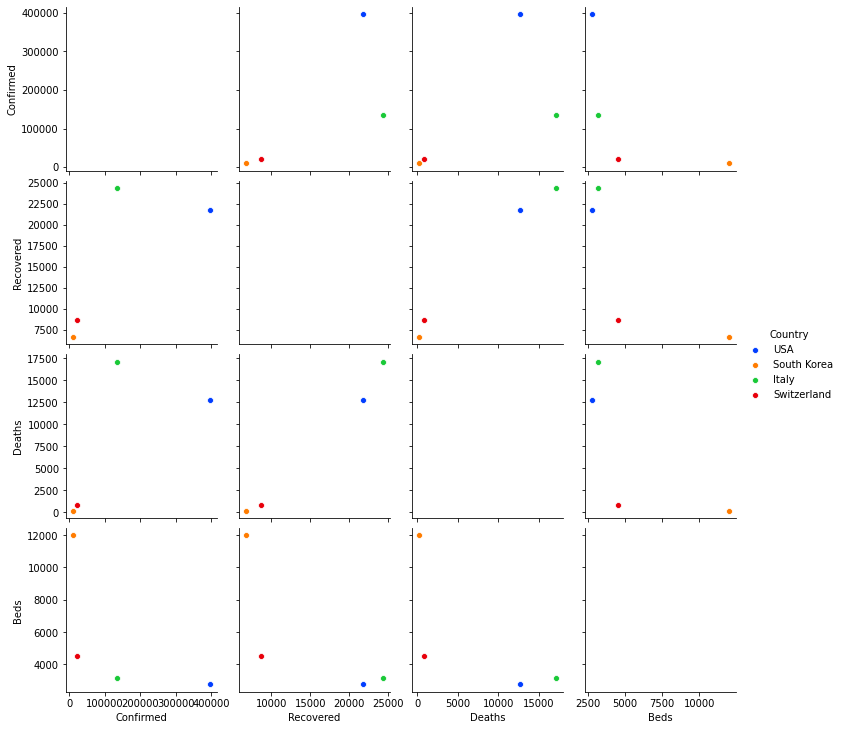

In [0]:
sns.pairplot(totals, kind="scatter", hue="Country",palette="bright")


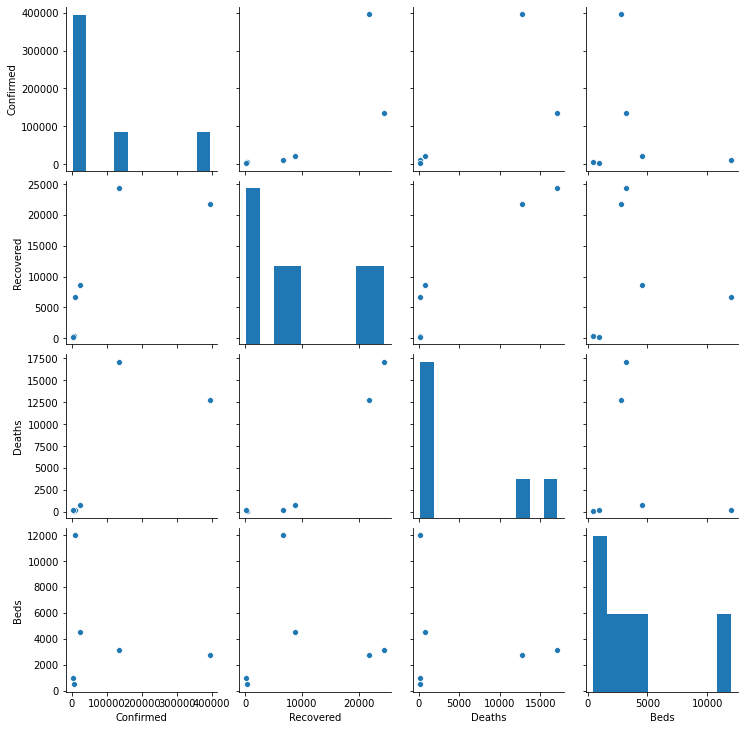

In [0]:
sns.pairplot(totals, kind="scatter")


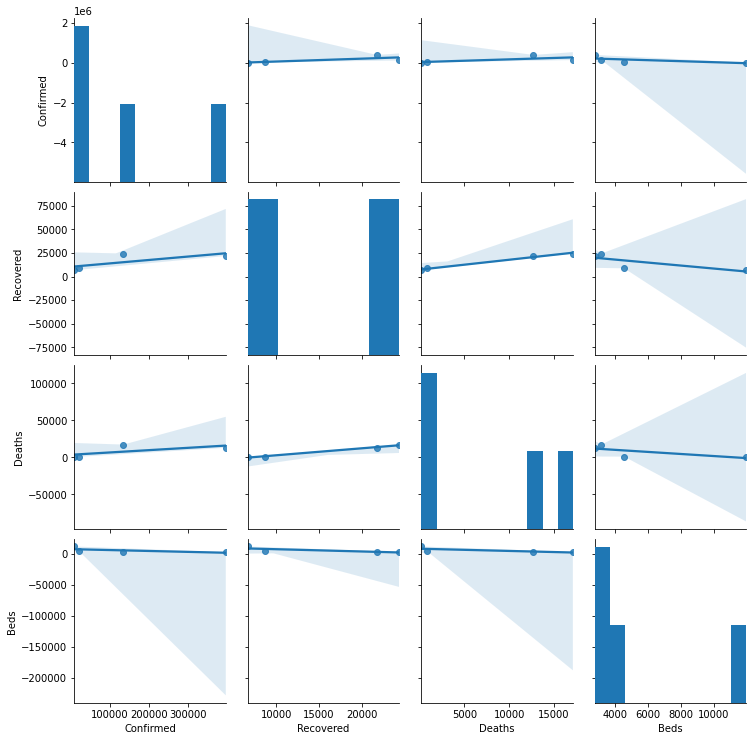

In [0]:
sns.pairplot(totals, kind="reg", palette="bright")


# **COVID-19 in Italy Dataset Exploration**

In [0]:
# Provincial dataset 
prov_df = pd.read_csv(dataset_dir + 'covid19-in-italy/covid19_italy_province.csv')
prov_df['Date'] = pd.to_datetime(prov_df['Date']) 
# Date ranges from 2/24/20 to 4/7/20
print('Data starts on: ' + str(prov_df['Date'].min()))
print('Data ends on: ' + str(prov_df['Date'].max()))
total_days = len(prov_df['Date'].unique())
# print('For a total of ' + str(total_days) + ' days')
# print('Do all provinces have data for the same ' + str(total_days) + ' days?')
# print(all([total_days == len(prov_df[(prov_df['ProvinceName'] == providence)]['Date'].unique() for province in prov_df['ProvinceName'].unique()])))
# print(prov_df.columns)

Data starts on: 2020-02-24 18:00:00
Data ends on: 2020-04-07 17:00:00


All provinces have data from the same 44 day span. 

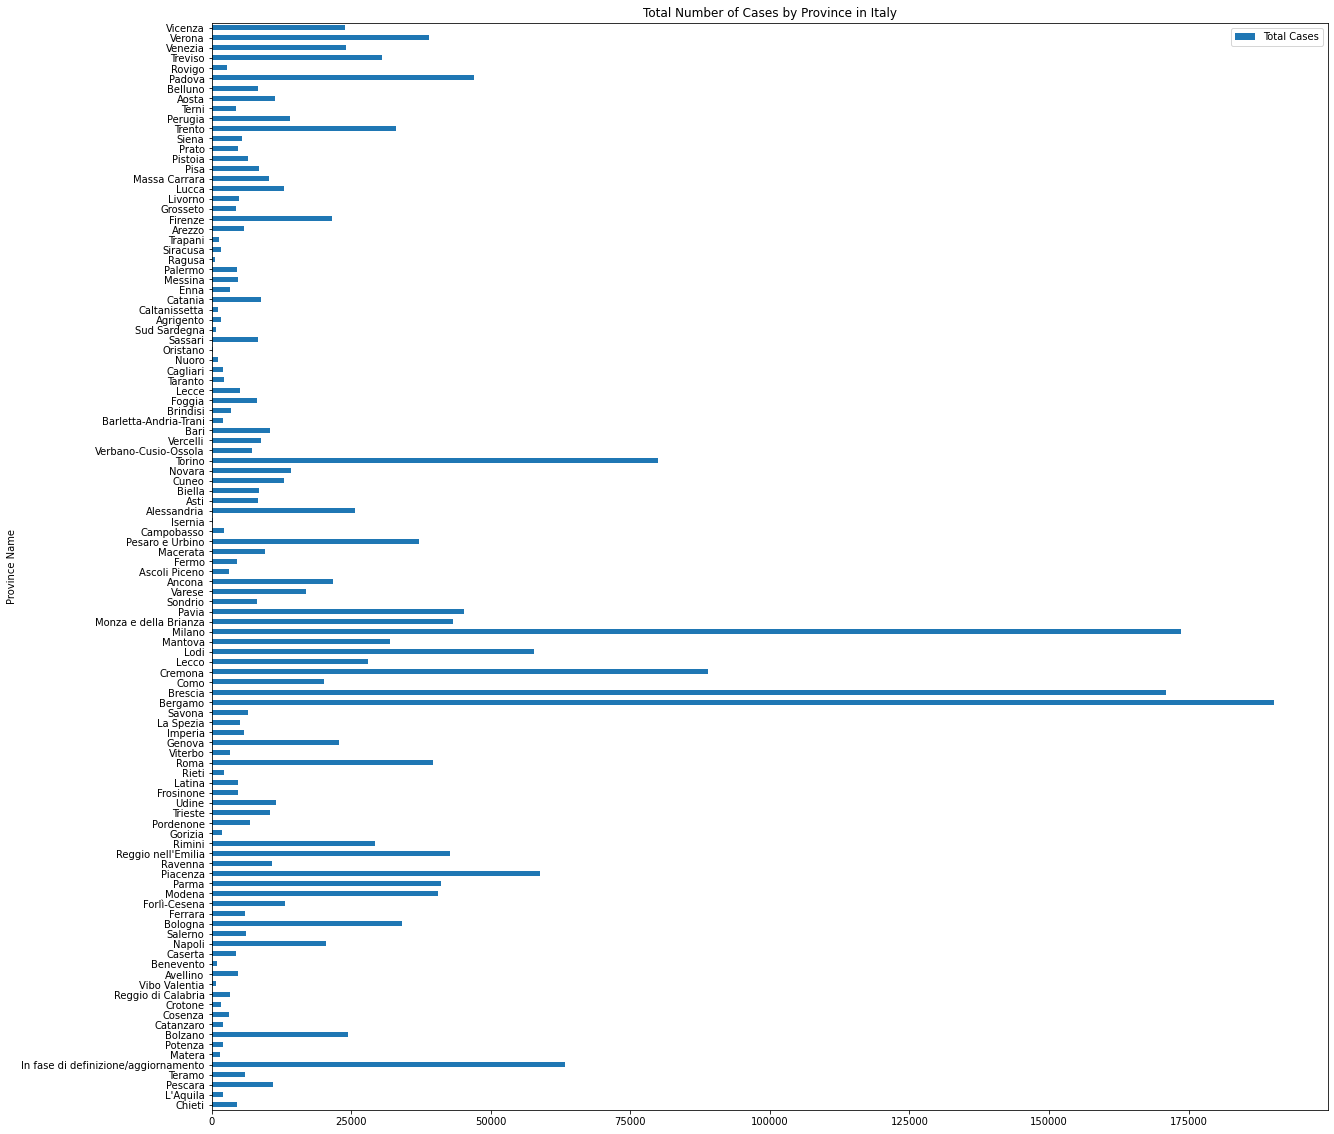

In [0]:
# Sum up number of cases across the 44 Days by province
cases_by_prov = []
for province in prov_df['ProvinceName'].unique():
  cases = prov_df[prov_df['ProvinceName']==province]['TotalPositiveCases'].sum()
  cases_by_prov.append(cases)

cbp = pd.DataFrame()
cbp['Province Name'] = prov_df['ProvinceName'].unique()
cbp['Total Cases'] = cases_by_prov
cbp.plot.barh(x = 'Province Name', y = 'Total Cases', figsize=(20,20), title='Total Number of Cases by Province in Italy')

In [0]:
# Regional dataset
region_df = pd.read_csv(dataset_dir + 'covid19-in-italy/covid19_italy_region.csv')
region_df['Date'] = pd.to_datetime(region_df['Date']) 
dates = region_df['Date'].unique()
print(dates.min())
print(dates.max())
total_days = len(dates)
print('Days with data: ' + str(total_days))
print(region_df.dtypes)

2020-02-24T18:00:00.000000000
2020-04-07T17:00:00.000000000
Days with data: 44
SNo                                   int64
Date                         datetime64[ns]
Country                              object
RegionCode                            int64
RegionName                           object
Latitude                            float64
Longitude                           float64
HospitalizedPatients                  int64
IntensiveCarePatients                 int64
TotalHospitalizedPatients             int64
HomeConfinement                       int64
CurrentPositiveCases                  int64
NewPositiveCases                      int64
Recovered                             int64
Deaths                                int64
TotalPositiveCases                    int64
TestsPerformed                        int64
dtype: object


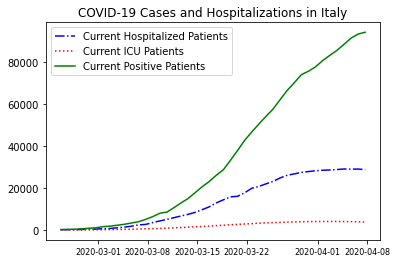

In [0]:
hosp = []
icu = []
pos = []
for d in dates: 
  hosp.append(region_df[region_df['Date'] == d]['HospitalizedPatients'].sum())
  icu.append(region_df[region_df['Date'] == d]['IntensiveCarePatients'].sum())
  pos.append(region_df[region_df['Date'] == d]['CurrentPositiveCases'].sum())
plt.plot(dates, hosp, c= 'b', ls = '-.', label = 'Current Hospitalized Patients')
plt.plot(dates, icu, c= 'r', ls= ':', label = 'Current ICU Patients')
plt.plot(dates, pos, c = 'g', ls='-', label= 'Current Positive Patients')
plt.tick_params(axis='x', which='major', labelsize=8)
plt.title('COVID-19 Cases and Hospitalizations in Italy')
plt.legend()
plt.show()

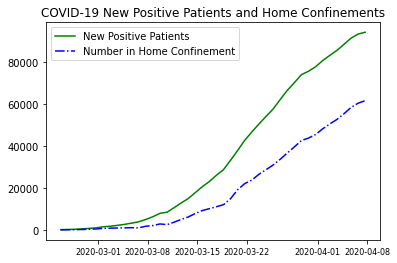

In [0]:
iso = [] # people in home confinement 
new_pos = []
for d in dates:
  iso.append(region_df[region_df['Date'] == d]['HomeConfinement'].sum())
  new_pos.append(region_df[region_df['Date'] == d]['NewPositiveCases'].sum())
plt.plot(dates, pos, c = 'g', ls='-', label= 'New Positive Patients')
plt.plot(dates, iso, c= 'b', ls = '-.', label = 'Number in Home Confinement')
plt.tick_params(axis='x', which='major', labelsize=8)
plt.legend()
plt.title('COVID-19 New Positive Patients and Home Confinements')
plt.show()
italy_df = region_df 

# **COVID-19 in India Dataset Exploration**

In [0]:
india_df = pd.read_csv(dataset_dir + 'covid19-in-india/covid_19_india.csv')
india_df['Date'] = pd.to_datetime(india_df['Date'])
india_df.dtypes

Sno                                  int64
Date                        datetime64[ns]
Time                                object
State/UnionTerritory                object
ConfirmedIndianNational             object
ConfirmedForeignNational            object
Cured                                int64
Deaths                               int64
Confirmed                            int64
dtype: object

Data spans 70 days
Do all provinces have data for the same 70 days?
False


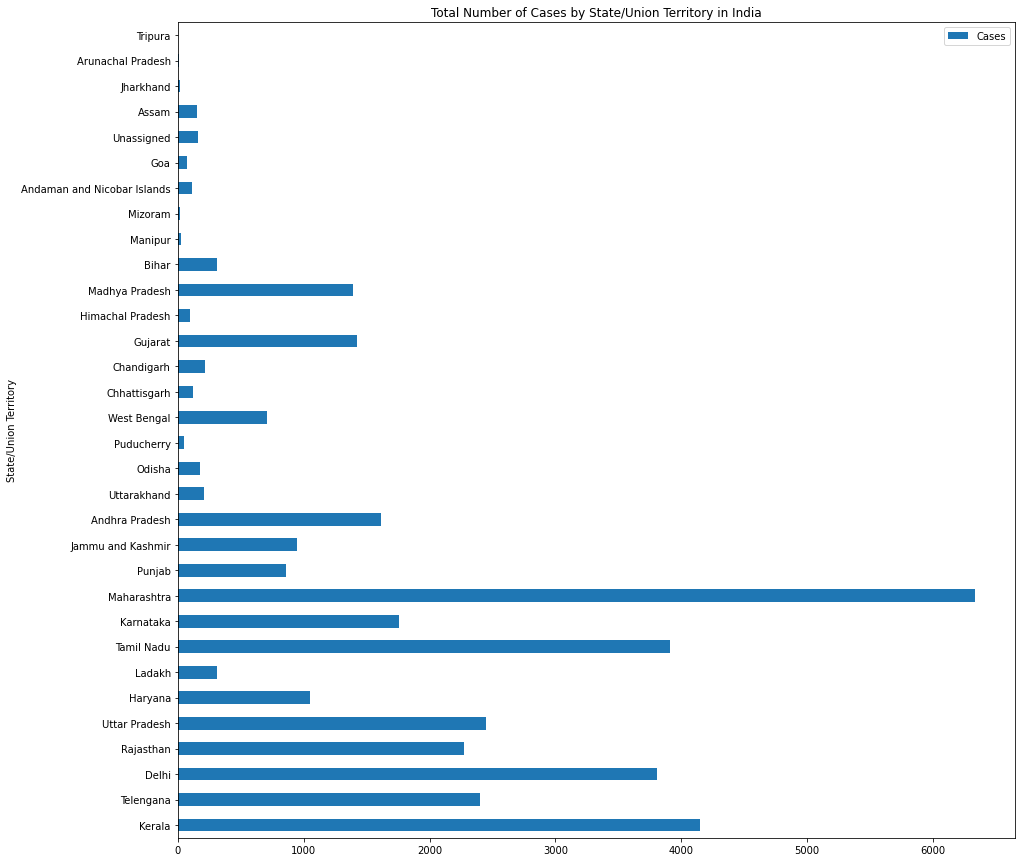

In [0]:
states = india_df['State/UnionTerritory'].unique()
dates = india_df['Date'].unique()
print('Data spans ' + str(len(dates)) + ' days')
print('Do all provinces have data for the same ' + str(len(dates)) + ' days?')
print(all([len(dates) == len(india_df[(india_df['State/UnionTerritory'] == state)]['Date'].unique()) for state in india_df['State/UnionTerritory'].unique()]))
state_cases = []
state_deaths = []

for s in states: 
  state_cases.append(india_df[india_df['State/UnionTerritory'] == s]['Confirmed'].sum())
  state_deaths.append(india_df[india_df['State/UnionTerritory'] == s]['Deaths'].sum())

cases_by_state = pd.DataFrame()
cases_by_state['Cases'] = state_cases
cases_by_state['Deaths'] = state_deaths
cases_by_state['State/Union Territory'] = states
cases_by_state.plot.barh(x = 'State/Union Territory', y = 'Cases', figsize=(15,15), title='Total Number of Cases by State/Union Territory in India')

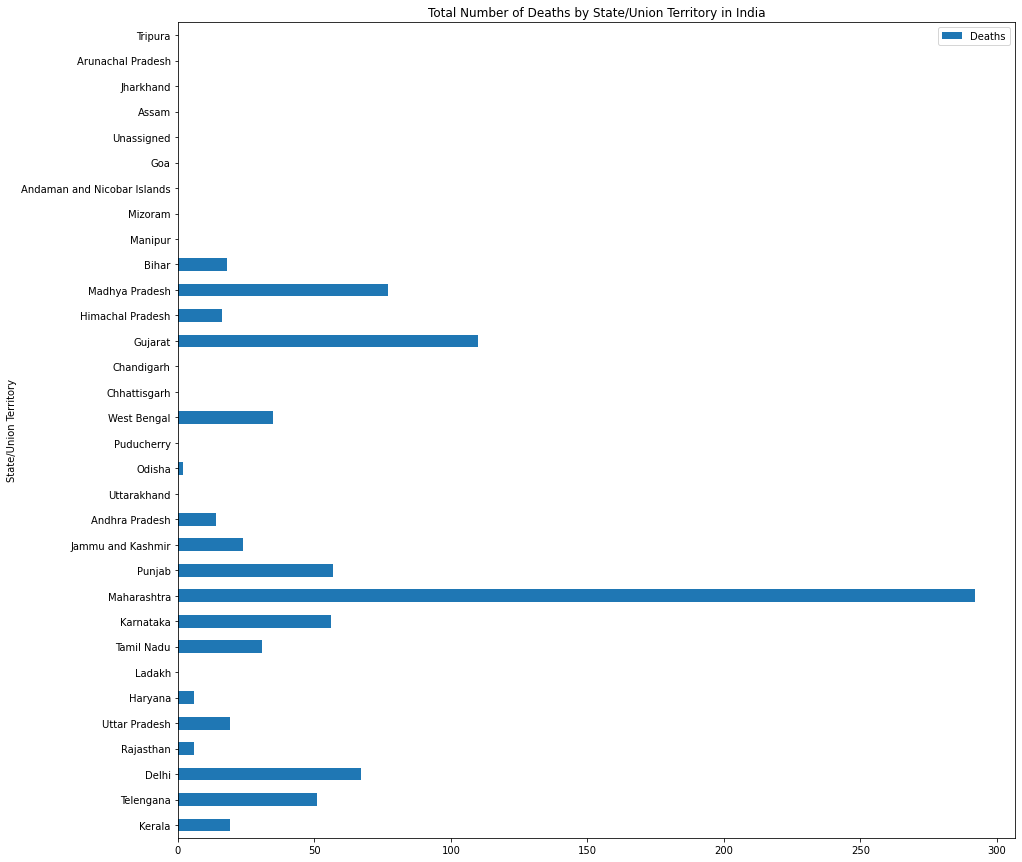

In [0]:
cases_by_state.plot.barh(x = 'State/Union Territory', y = 'Deaths', figsize=(15,15), title='Total Number of Deaths by State/Union Territory in India')

# **COVID-19 in South Korea Dataset Exploration**

In [0]:
sk_df_patient = pd.read_csv(dataset_dir + 'coronavirusdataset_korea/PatientInfo.csv')
sk_df_patient = sk_df_patient.loc[:, ['confirmed_date', 'released_date', 'deceased_date', 'state']]
sk_df_patient.head()

,confirmed_date,released_date,deceased_date,state
0,2020-01-23,2020-02-05,NaN,released
1,2020-01-30,2020-03-02,NaN,released
2,2020-01-30,2020-02-19,NaN,released
3,2020-01-30,2020-02-15,NaN,released
4,2020-01-31,2020-02-24,NaN,released


In [0]:
sk_df_testing = pd.read_csv(dataset_dir + 'coronavirusdataset_korea/Time.csv')
sk_df_testing = sk_df_testing.loc[:, ['date', 'test', 'confirmed', 'deceased', 'released']]
sk_df_testing.head()

,date,test,confirmed,deceased,released
0,2020-01-20,1,1,0,0
1,2020-01-21,1,1,0,0
2,2020-01-22,4,1,0,0
3,2020-01-23,22,1,0,0
4,2020-01-24,27,2,0,0


In [0]:
# Want to see if the ranges of dates align across the two datasets 
sk_df_patient['confirmed_date'] = pd.to_datetime(sk_df_patient['confirmed_date'])
sk_df_patient['released_date'] = pd.to_datetime(sk_df_patient['released_date'])
sk_df_patient['deceased_date'] = pd.to_datetime(sk_df_patient['deceased_date'])
sk_df_testing['date'] = pd.to_datetime(sk_df_testing['date'])
print(sk_df_patient['confirmed_date'].min() == sk_df_testing['date'].min())
print(sk_df_patient['confirmed_date'].max() == sk_df_testing['date'].max())
# Want to see if number daily confirmed cases in testing dataset matches patient dataset
dates = sk_df_testing['date'].unique()
confirmed_testing = []
confirmed_patient = []
# hospitalized = []
for d in dates: 
  confirmed_testing.append(sk_df_testing[sk_df_testing['date'] == d]['confirmed'].sum())
  confirmed_patient.append(len(sk_df_patient[sk_df_patient['confirmed_date'] == d]))
  # today = sk_df_testing[sk_df_patient['date'] == d]
  # hospitalized.append(today[today['state']])
sk_df = pd.DataFrame()
sk_df['Date'] = dates 
sk_df['TotalPositiveCases'] = confirmed_testing 
sk_df['NewPositiveCases'] = confirmed_patient
sk_df['Deaths'] = sk_df_testing['deceased']
sk_df['Recovered'] = sk_df_testing['released']
sk_df.head()

True
True


,Date,TotalPositiveCases,NewPositiveCases,Deaths,Recovered
0,2020-01-20,1,1,0,0
1,2020-01-21,1,0,0,0
2,2020-01-22,1,0,0,0
3,2020-01-23,1,1,0,0
4,2020-01-24,2,0,0,0


In [0]:
sk_df_patient['confirmed_date'] = pd.to_datetime(sk_df_patient['confirmed_date'])
sk_df_patient['released_date'] = pd.to_datetime(sk_df_patient['released_date'])
sk_df_patient['deceased_date'] = pd.to_datetime(sk_df_patient['deceased_date'])

date_range = sk_df['Date']
hospitalized = [0] * len(date_range)
for i in range(len(date_range)):
  date = date_range[i]
  confirmed_today = sk_df_patient[sk_df_patient['confirmed_date'] == date]
  # print(type(confirmed_today))
  for idx, patient in confirmed_today.iterrows():
    if isinstance(patient['released_date'], pd.Timestamp):
      len_hosp = (patient['released_date'] - date).days
    elif isinstance(patient['deceased_date'], pd.Timestamp):
      len_hosp = (patient['deceased_date'] - date).days
    else: len_hosp = pd.to_timedelta((date_range[len(date_range) - 1] - date)).days
    for j in range(i, len_hosp):
        hospitalized[j] += 1
sk_df['HospitalizedPatients'] = hospitalized 
tot_hosp = [hospitalized[0]]
for i in range(1,len(hospitalized)):
  tot_hosp.append(sum(hospitalized[:i+1]))
sk_df['TotalHospitalizedPatients'] = tot_hosp
sk_df

,Date,TotalPositiveCases,NewPositiveCases,Deaths,Recovered,HospitalizedPatients,TotalHospitalizedPatients
0,2020-01-20,1,1,0,0,1,1
1,2020-01-21,1,0,0,0,1,2
2,2020-01-22,1,0,0,0,1,3
3,2020-01-23,1,1,0,0,2,5
4,2020-01-24,2,0,0,0,2,7
...,...,...,...,...,...,...,...
74,2020-04-03,10062,44,174,6021,0,3404
75,2020-04-04,10156,40,177,6325,0,3404
76,2020-04-05,10237,26,183,6463,0,3404
77,2020-04-06,10284,19,186,6598,0,3404


# **COVID-19 in Switzerland Dataset Exploration**

In [0]:
switz_cases_df = pd.read_csv(dataset_dir + 'covid19-cases-switzerland/covid19_cases_switzerland.csv')
switz_cases_df['Date'] = pd.to_datetime(switz_cases_df['Date'])
dates = switz_cases_df['Date'].unique()
earliest = dates.min()
latest = dates.max()
cases = []
for d in dates: 
  cases.append(int(switz_cases_df[switz_cases_df['Date'] == d].sum(axis=1).values[0]))

switz_fat_df = pd.read_csv(dataset_dir + 'covid19-cases-switzerland/covid19_fatalities_switzerland.csv')
switz_fat_df['Date'] = pd.to_datetime(switz_fat_df['Date'])
fatalities = []
for d in dates: 
  fatalities.append(int(switz_fat_df[switz_fat_df['Date'] == d].sum(axis=1).values[0]))

switz_hosp_df = pd.read_csv(dataset_dir + 'covid19-cases-switzerland/covid19_hospitalized_switzerland_openzh.csv')
switz_hosp_df['Date'] = pd.to_datetime(switz_hosp_df['Date'])
switz_hosp_df = switz_hosp_df[(switz_hosp_df['Date'] >= earliest)]
switz_hosp_df = switz_hosp_df[(switz_hosp_df['Date'] <= latest)]
hospitalizations = []
for d in dates: 
  hospitalizations.append(int(switz_hosp_df[switz_hosp_df['Date'] == d].sum(axis=1).values[0]))

switz_rel_df = pd.read_csv(dataset_dir + 'covid19-cases-switzerland/covid19_released_switzerland_openzh.csv')
switz_rel_df['Date'] = pd.to_datetime(switz_rel_df['Date'])
switz_rel_df = switz_rel_df[(switz_rel_df['Date'] >= earliest)]
switz_rel_df = switz_rel_df[(switz_rel_df['Date'] <= latest)]
released = []
for d in dates: 
  released.append(int(switz_rel_df[switz_rel_df['Date'] == d].sum(axis=1).values[0]))

switz_icu_df = pd.read_csv(dataset_dir + 'covid19-cases-switzerland/covid19_icu_switzerland_openzh.csv')
switz_icu_df['Date'] = pd.to_datetime(switz_icu_df['Date'])
switz_icu_df = switz_icu_df[(switz_icu_df['Date'] >= earliest)]
switz_icu_df = switz_rel_df[(switz_icu_df['Date'] <= latest)]
icu = []
for d in dates: 
  icu.append(int(switz_icu_df[switz_icu_df['Date'] == d].sum(axis=1).values[0]))

switz_df = pd.DataFrame()
switz_df['Date'] = dates 
switz_df['TotalPositiveCases'] = cases
switz_df['Deaths'] = fatalities
switz_df['TotalHospitalizedPatients'] = hospitalizations
switz_df['IntensiveCarePatients'] = icu
switz_df['Recovered'] = released
switz_df.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:35: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


,Date,TotalPositiveCases,Deaths,TotalHospitalizedPatients,IntensiveCarePatients,Recovered
0,2020-03-06,416,0,57,2,2
1,2020-03-07,526,0,56,1,1
2,2020-03-08,656,0,77,1,1
3,2020-03-09,752,1,109,6,6
4,2020-03-10,1010,2,135,14,14


# **COVID-19 in USA Dataset Exploration**

In [0]:
us_df = pd.read_csv(dataset_dir + 'covid19-in-usa/us_covid19_daily.csv')
us_df.head()
us_df['date'] = pd.to_datetime(us_df['date'], format="%Y%m%d")
us_df['TestsPerformed'] = us_df['positive'] + us_df['negative'] + us_df['pending']
us_df = us_df.rename(columns={"date": "Date", "hospitalizedCurrently": "HospitalizedPatients", "hospitalizedCumulative": "TotalHospitalizedPatients", "inIcuCurrently": "IntensiveCarePatients", "recovered":"Recovered", "death": "Deaths"})
us_df = us_df.loc[:, ['Date', 'HospitalizedPatients', 'TotalHospitalizedPatients', 'IntensiveCarePatients', 'Recovered', 'Deaths', 'TestsPerformed']]
us_df

,Date,HospitalizedPatients,TotalHospitalizedPatients,IntensiveCarePatients,Recovered,Deaths,TestsPerformed
0,2020-04-07,39011.0,45562.0,9649.0,17809.0,12621,2071019
1,2020-04-06,27675.0,45168.0,6607.0,16006.0,10680,1934387
2,2020-04-05,23061.0,41372.0,5497.0,14486.0,9498,1779339
3,2020-04-04,22158.0,38402.0,5207.0,12784.0,8314,1639380
4,2020-04-03,19926.0,35991.0,4686.0,10422.0,6962,1458842
5,2020-04-02,17157.0,32649.0,4264.0,8586.0,5784,1329849
6,2020-04-01,16223.0,31142.0,3837.0,7084.0,4700,1209675
7,2020-03-31,14236.0,26660.0,3402.0,5666.0,3746,1108402
8,2020-03-30,12147.0,22303.0,2982.0,4560.0,2939,1010223
9,2020-03-29,9922.0,19401.0,2456.0,4061.0,2428,896896


# **Further Data Exploration**

2020-03-06 00:00:00
2020-03-27 00:00:00


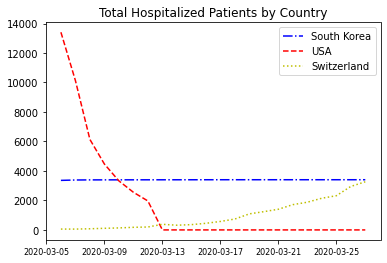

In [0]:
hospitalization_df = pd.DataFrame()
min_date, max_date = switz_df['Date'].min(), switz_df['Date'].max()
print(min_date)
print(max_date)
# it = italy_df[(italy_df['Date'] <= max_date)]
# # print(it)
# it = it[(it['Date'] >= min_date)]
# print(it)
sk = sk_df[(sk_df['Date'] <= max_date)]
sk = sk[(sk['Date'] >= min_date)]['TotalHospitalizedPatients']
us = us_df[(us_df['Date'] <= max_date)]
us = us[(us['Date'] >= min_date)]['TotalHospitalizedPatients'].fillna(0)
sw = switz_df['TotalHospitalizedPatients']
dates = switz_df['Date']
# plt.plot(dates, it, c = 'g', ls='-', label= 'Italy')
plt.plot(dates, sk, c= 'b', ls = '-.', label = 'South Korea')
plt.plot(dates, us, c= 'r', ls = '--', label = 'USA')
plt.plot(dates, sw, c= 'y', ls = ':', label = 'Switzerland')
plt.tick_params(axis='x', which='major', labelsize=8)
plt.legend()
plt.title('Total Hospitalized Patients by Country')
plt.show()
